In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import talib
import json
import requests

import numpy as np

In [2]:
minute_data_cols = ['open', 'high', 'low', 'close', 'volume', 'time']
binance_swap_min_BTCUSDT = pd.read_csv('binance_swap_kline.BTCUSDT.csv')
binance_swap_min_BTCUSDT['t'] = pd.to_datetime(binance_swap_min_BTCUSDT['t'], unit='ms')
binance_swap_min_BTCUSDT.columns = minute_data_cols
binance_swap_min_BTCUSDT.set_index('time', inplace=True)

binance_swap_min_BTCUSDT = binance_swap_min_BTCUSDT.loc["2019-09-09 02:51:00":"2020-08-31 00:00:00"]

binance_swap_min_BTCUSDT = binance_swap_min_BTCUSDT.groupby(binance_swap_min_BTCUSDT.index).last()

binance_swap_min_BTCUSDT['avg_price'] = (binance_swap_min_BTCUSDT['close'] + binance_swap_min_BTCUSDT['high'] + binance_swap_min_BTCUSDT['low']) / 3

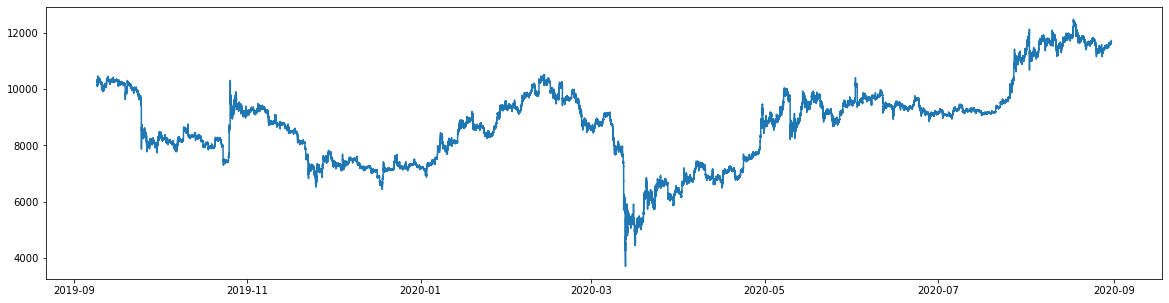

In [3]:
plt.figure(figsize=(20, 5))
plt.plot(binance_swap_min_BTCUSDT['avg_price'])

In [4]:
binance_swap_min_BTCUSDT

,open,high,low,close,volume,avg_price
time,,,,,,
2019-09-09 02:51:00,10316.62,10316.62,10316.62,10316.62,4.421,10316.620000
2019-09-09 02:52:00,10316.62,10316.65,10316.29,10316.63,11.954,10316.523333
2019-09-09 02:53:00,10316.63,10316.63,10315.14,10316.18,12.773,10315.983333
2019-09-09 02:54:00,10316.18,10316.18,10314.14,10314.14,9.889,10314.820000
2019-09-09 02:55:00,10316.14,10316.30,10315.47,10316.26,10.601,10316.010000
...,...,...,...,...,...,...
2020-08-30 23:56:00,11712.07,11712.07,11708.00,11708.35,115.940,11709.473333
2020-08-30 23:57:00,11708.35,11708.78,11703.07,11706.69,119.834,11706.180000
2020-08-30 23:58:00,11706.69,11717.00,11706.26,11714.94,233.522,11712.733333


In [5]:
interval= 5
return_pd_series = binance_swap_min_BTCUSDT['avg_price'].pct_change(periods=interval).shift(-interval)
return_label = binance_swap_min_BTCUSDT['avg_price'].pct_change(periods=interval).dropna().values

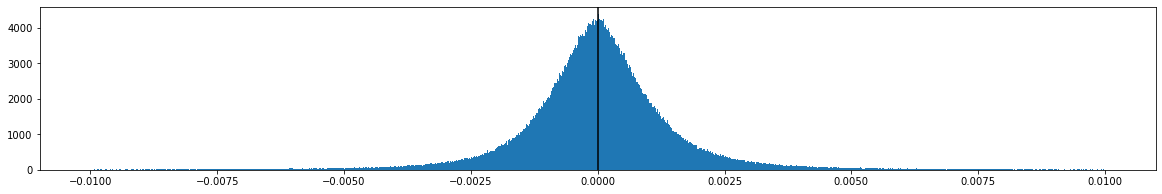

In [6]:
plt.figure(figsize=(20, 3))
ax = plt.axes()
vector, bins, patches = ax.hist(return_label, bins=1000, range=(-0.01, 0.01))
ax.axvline(x=0, color='k')

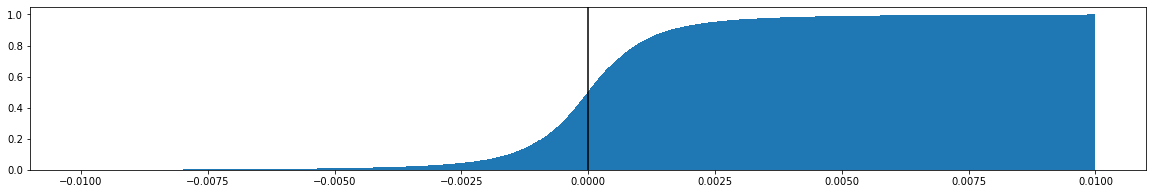

In [8]:
plt.figure(figsize=(20, 3))
ax = plt.axes()
vector, bins, patches = ax.hist(return_label, bins=1000, range=(-0.01, 0.01), cumulative=True, density=True)
ax.axvline(x=0, color='k')

In [11]:
for i in range(len(vector)):
    if vector[i] + (1 - vector[len(vector) - i - 1]) > 0.2:
        print("Short Threshold: {}, Long Threshold: {}".format(bins[i], bins[len(vector) - i - 1]))
        print("Density : ({}, {})".format(vector[i], vector[len(vector) - i - 1]))
        break

Short Threshold: -0.001599999999999999, Long Threshold: 0.0015800000000000015
Density : (0.09846062260481997, 0.898032158320295)


In [12]:
df = binance_swap_min_BTCUSDT
upperband, middleband, lowerband = talib.BBANDS(df['close'], timeperiod=50, nbdevup=10, nbdevdn=10, matype=7)
res = (upperband - df['avg_price']) / (df['avg_price'] - lowerband)
pd.concat([res, return_pd_series], axis=1).dropna().corr().iloc[0, 1]

0.0013745997462720387

In [392]:
df = binance_swap_min_BTCUSDT
for i in range(3, 60):
    sma1 = talib.SMA(df['close'], timeperiod=5)
    sma2 = talib.SMA(df['close'], timeperiod=i)
    real = sma2 - sma1
    corr = pd.concat([real, return_pd_series], axis=1).dropna().corr().iloc[0, 1]
    print(i, corr)

3 -0.013663539833729456
4 -0.020576477141973793
5 nan
6 0.031218730048471713
7 0.03617050134379437
8 0.03896237819725397
9 0.039993012081081324
10 0.04035763357973158
11 0.039700181591094355
12 0.03832339707679157
13 0.03655336826336294
14 0.034489371143054774
15 0.03250181660059477
16 0.030707528317882208
17 0.029178913743627338
18 0.0279593360402801
19 0.026967855915141944
20 0.02605785782050677
21 0.025337336722634128
22 0.024804249307538828
23 0.024471914363205782
24 0.02431275522859397
25 0.024312449998156148
26 0.024400129927859254
27 0.024567785843048525
28 0.024774928539298243
29 0.02503317821837656
30 0.025380322115070172
31 0.025813845798677907
32 0.02625389435617752
33 0.026646558952165333
34 0.026947571324009243
35 0.02715088217426414
36 0.027301872552333385
37 0.02742624278152031
38 0.027530660853738703
39 0.027601000022029584
40 0.02763049726494834
41 0.02759414408026666
42 0.027495159733540688
43 0.027360841414691788
44 0.027226528239436724
45 0.02709609844310823
46 0.02

In [110]:
df = binance_swap_min_BTCUSDT
mama, fama = talib.MAMA(df['close'], fastlimit=0.9, slowlimit=0.01)
real = fama - mama
pd.concat([real, return_pd_series], axis=1).dropna().corr().iloc[0, 1]

0.022346854401621586

In [147]:
df = binance_swap_min_BTCUSDT
for i in range(6, 100, 2):
    midp1 = talib.MIDPOINT(df['close'], timeperiod=i)
    midp2 = talib.MIDPOINT(df['close'], timeperiod=3)
    real = midp1 - midp2
    corr = pd.concat([real, return_pd_series], axis=1).dropna().corr().iloc[0, 1]
    print(i, corr)

6 0.0007593699638698147
8 0.0007593699638698147
10 0.0007593699638698147
12 0.0007593699638698147
14 0.0007593699638698147
16 0.0007593699638698147
18 0.0007593699638698147
20 0.0007593699638698147
22 0.0007593699638698147
24 0.0007593699638698147
26 0.0007593699638698147
28 0.0007593699638698147
30 0.0007593699638698147
32 0.0007593699638698147
34 0.0007593699638698147
36 0.0007593699638698147
38 0.0007593699638698147
40 0.0007593699638698147
42 0.0007593699638698147
44 0.0007593699638698147
46 0.0007593699638698147
48 0.0007593699638698147
50 0.0007593699638698147
52 0.0007593699638698147
54 0.0007593699638698147
56 0.0007593699638698147
58 0.0007593699638698147
60 0.0007593699638698147
62 0.0007593699638698147
64 0.0007593699638698147
66 0.0007593699638698147
68 0.0007593699638698147
70 0.0007593699638698147
72 0.0007593699638698147
74 0.0007593699638698147
76 0.0007593699638698147
78 0.0007593699638698147
80 0.0007593699638698147
82 0.0007593699638698147
84 0.0007593699638698147
86

In [159]:
df = binance_swap_min_BTCUSDT
for i in range(5, 100, 2):
    midp1 = talib.MIDPRICE(df['high'], df['low'], timeperiod=i)
    midp2 = talib.MIDPRICE(df['high'], df['low'], timeperiod=3)
    real = midp1 - midp2
    corr = pd.concat([real, return_pd_series], axis=1).dropna().corr().iloc[0, 1]
    print(i, corr)


5 0.02867146835409389
7 0.04144181512784908
9 0.04572327611354093
11 0.04184854525325381
13 0.034725052378146166
15 0.028897028425208162
17 0.02504342349206686
19 0.022812237683676507
21 0.02010520853711523
23 0.019266979767338762
25 0.02078962720503365
27 0.022814848023072584
29 0.023563033511927744
31 0.024656771263862187
33 0.026071218422706623
35 0.026764071005833185
37 0.027628857847061025
39 0.02739749290171501
41 0.02618043860718479
43 0.02485654204833929
45 0.023971088865351122
47 0.023032788500418417
49 0.021996419932379958
51 0.021278814267038763
53 0.02085211382831988
55 0.020052979670602374
57 0.01908851753362573
59 0.018202734948540224
61 0.017203920330446577
63 0.017101699212663073
65 0.017626181367719523
67 0.01776352895158872
69 0.017227541776241462
71 0.01669564181045804
73 0.01662661623565413
75 0.01681010739686472
77 0.01669291866417786
79 0.01614288276870671
81 0.01614400262702465
83 0.016463473812874288
85 0.016599865020936782
87 0.016318601211377324
89 0.016291115

In [302]:
df = binance_swap_min_BTCUSDT
sar = talib.SAR(df['high'], df['low'], acceleration=0.4, maximum=1)
real = df['close'] / sar - 1
pd.concat([real, return_pd_series], axis=1).dropna().corr().iloc[0, 1]

0.044958006963791465

In [81]:
df = binance_swap_min_BTCUSDT
s = 2
for i in range(s+1, 30):
    wma1 = talib.WMA(df['avg_price'], timeperiod=i)
    wma2 = talib.WMA(df['avg_price'], timeperiod=s)
    real = wma2 - wma1
    corr = pd.concat([real, return_pd_series], axis=1).dropna().corr().iloc[0, 1]
    print(i, corr)

3 0.020226427833641418
4 0.009246601211580179
5 0.0007486974931158199
6 -0.006228980292332477
7 -0.01195926650661549
8 -0.016581364974361343
9 -0.020245021956452947
10 -0.023120875904915225
11 -0.025285175235175858
12 -0.026834634040755978
13 -0.027864864143517003
14 -0.028468844916732055
15 -0.02876608251342859
16 -0.028848155338568163
17 -0.028791745629639823
18 -0.028656848968815433
19 -0.02847645283898428
20 -0.028259922742802326
21 -0.028028384703811245
22 -0.027798951482705614
23 -0.02758741813078108
24 -0.027403422309629954
25 -0.02725527030598841
26 -0.027143908559286445
27 -0.0270692169899611
28 -0.02702753460494544
29 -0.027018615143007834


In [326]:
df = binance_swap_min_BTCUSDT
pdi1 = talib.PLUS_DI(df['high'], df['low'], df['close'], timeperiod=15)
pdi2 = talib.PLUS_DI(df['high'], df['low'], df['close'], timeperiod=7)
delta_pdi = pdi1 / pdi2

mdi1 = talib.MINUS_DI(df['high'], df['low'], df['close'], timeperiod=15)
mdi2 = talib.MINUS_DI(df['high'], df['low'], df['close'], timeperiod=7)
delta_mdi = mdi1 / mdi2

real = delta_pdi.fillna(0).values / np.linalg.norm(delta_pdi.fillna(0).values) - delta_mdi.fillna(0).values / np.linalg.norm(delta_mdi.fillna(0).values)
real = pd.Series(real, index=delta_pdi.index)
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)
real

0.021037035338413133


time
2019-09-09 02:51:00    0.000000
2019-09-09 02:52:00    0.000000
2019-09-09 02:53:00    0.000000
2019-09-09 02:54:00    0.000000
2019-09-09 02:55:00    0.000000
                         ...   
2020-08-30 23:56:00   -0.000723
2020-08-30 23:57:00   -0.000191
2020-08-30 23:58:00   -0.000480
2020-08-30 23:59:00   -0.000686
2020-08-31 00:00:00   -0.000913
Length: 513910, dtype: float64

In [377]:
pdi = talib.PLUS_DI(df['high'], df['low'], df['close'], timeperiod=6)
mdi = talib.MINUS_DI(df['high'], df['low'], df['close'], timeperiod=6)
adx = talib.ADX(df['high'], df['low'], df['close'], timeperiod=3)
real = adx.pct_change(5) * (mdi - pdi)
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.01788248989377219


In [569]:
adxr = talib.ADXR(df['high'], df['low'], df['close'], timeperiod=5)
corr = pd.concat([adxr-df['low'], return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.0065578551726360925


In [538]:
real

time
2019-09-09 02:51:00         NaN
2019-09-09 02:52:00         NaN
2019-09-09 02:53:00         NaN
2019-09-09 02:54:00         NaN
2019-09-09 02:55:00         NaN
                         ...   
2020-08-30 23:56:00    1.457457
2020-08-30 23:57:00    1.407365
2020-08-30 23:58:00    1.412173
2020-08-30 23:59:00    1.595564
2020-08-31 00:00:00    1.762076
Length: 513910, dtype: float64

In [609]:
apo = talib.APO( df['close'], fastperiod=5, slowperiod=10, matype=5)
corr = pd.concat([apo, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

-0.044647719964074434


In [36]:
aroondown, aroonup = talib.AROON(df['high'], df['low'], timeperiod=7)
real = aroonup - aroondown
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

-0.0243022169596869


In [37]:
real

time
2019-09-09 02:51:00           NaN
2019-09-09 02:52:00           NaN
2019-09-09 02:53:00           NaN
2019-09-09 02:54:00           NaN
2019-09-09 02:55:00           NaN
                          ...    
2020-08-30 23:56:00     71.428571
2020-08-30 23:57:00     71.428571
2020-08-30 23:58:00    100.000000
2020-08-30 23:59:00    100.000000
2020-08-31 00:00:00    100.000000
Length: 513910, dtype: float64

In [55]:
aroonosc1 = talib.AROONOSC(df['high'], df['low'], timeperiod=3)
aroonosc2 = talib.AROONOSC(df['high'], df['low'], timeperiod=5)
real = aroonosc1 - aroonosc2
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.015459798850688045


In [59]:
bop = talib.BOP(df['open'], df['high'], df['low'], df['close'])
corr = pd.concat([bop, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.05942237786015978


In [69]:
real = talib.CCI(df['high'], df['low'], df['close'], timeperiod=2)
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.03076714973348987


In [88]:
cci1 = talib.CCI(df['high'], df['low'], df['close'], timeperiod=2)
cci2 = talib.CCI(df['high'], df['low'], df['close'], timeperiod=10)
real = cci1 - cci2
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.020557317688612808


In [102]:
real = talib.CMO(df['close'], timeperiod=3)
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.021353338602574042


In [139]:
cmo1 = talib.CMO(df['close'], timeperiod=3)
cmo2 = talib.CMO(df['close'], timeperiod=4)
real = cmo1 - cmo2
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.03317612894406055


In [267]:
# macd, macdsignal, macdhist = talib.MACDEXT(df['close'], fastperiod=6, fastmatype=4, slowperiod=15, slowmatype=2, signalperiod=5, signalmatype=5)
macd, macdsignal, macdhist = talib.MACDFIX(df['close'], signalperiod=2)
real = macdsignal
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

-0.022069132875553635


In [519]:
mfi = talib.MFI(df['high'], df['low'], df['close'], df['volume'], timeperiod=6)
def submap(x):
    if x < 10:
        return 1 - x / 40
    elif x > 90:
        return 1 - x / 60
    else:
        return 1 - x / 50
real = mfi.apply(submap)
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.019381882485733234


In [404]:
mom1 = talib.MOM(df['close'], timeperiod=2)
mom2 = talib.MOM(df['close'], timeperiod=8)
real = mom1 - mom2
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.04526525745954407


In [450]:
real = talib.PPO(df['close'], fastperiod=2, slowperiod=3, matype=4)
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.10881245457800792


In [464]:
real = talib.RSI(df['close'], timeperiod=2)
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.03048311928668578


In [478]:
rsi1 = talib.RSI(df['close'], timeperiod=2)
rsi2 = talib.RSI(df['close'], timeperiod=3)
real = rsi1 - rsi2
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.04357390738956403


In [523]:
rsi = talib.RSI(df['close'], timeperiod=2)
def submap(x):
    if x < 10:
        return 1 - x / 30
    elif x > 90:
        return 1 - x / 70
    else:
        return 1 - x / 50
real = rsi.apply(submap) * df['volume']
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

-0.04321709712747178


In [554]:
slowk, slowd = talib.STOCH(df['high'], df['low'], df['close'], fastk_period=3, slowk_period=2, slowd_period=2, slowk_matype=3,  slowd_matype=2)
real = slowk - slowd
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.07216574853103228


In [586]:
fastk, fastd = talib.STOCHF(df['high'], df['low'], df['close'], fastk_period=5, fastd_period=2, fastd_matype=0)
real = fastk - fastd
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.07289457173192165


In [632]:
fastk, fastd = talib.STOCHRSI(df['close'], timeperiod=12, fastk_period=60, fastd_period=2, fastd_matype=0)
real = fastk - fastd
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.07181228971843795


In [657]:
real = talib.TRIX(df['close'], timeperiod=5)
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

-0.02131058484367095


In [675]:
real = talib.ULTOSC(df['high'], df['low'], df['close'], timeperiod1=2, timeperiod2=6, timeperiod3=10)
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.0493895094983053


In [680]:
real = talib.WILLR(df['high'], df['low'], df['close'], timeperiod=2)
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.06541794766691741


In [704]:
willr1 = talib.WILLR(df['high'], df['low'], df['close'], timeperiod=2)
willr2 = talib.WILLR(df['high'], df['low'], df['close'], timeperiod=9)
real = willr1 - willr2
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.05468053540401173


In [708]:
real = talib.AD(df['high'], df['low'], df['close'], df['volume'])
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.0016023991254713568


In [715]:
real = talib.ADOSC(df['high'], df['low'], df['close'], df['volume'], fastperiod=2, slowperiod=3)
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.07645154181895464


In [719]:
real = talib.OBV(df['close'], df['volume'])
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

-0.003562621636223859


In [745]:
atr1 = talib.ATR(df['high'], df['low'], df['close'], timeperiod=3)
atr2 = talib.ATR(df['high'], df['low'], df['close'], timeperiod=9)
real = atr1 - atr2
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.025034547561483


In [759]:
real = talib.NATR(df['high'], df['low'], df['close'], timeperiod=3)
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.029827624894644033


In [771]:
natr1 = talib.NATR(df['high'], df['low'], df['close'], timeperiod=4)
natr2 = talib.NATR(df['high'], df['low'], df['close'], timeperiod=8)
real = natr1 - natr2
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.035482065137833446


In [774]:
real = talib.TRANGE(df['high'], df['low'], df['close'])
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

0.01566066894021157


In [789]:
ht_dcperiod = talib.HT_DCPERIOD(df['close'])
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

-0.002942822759962545


In [796]:
inphase, quadrature = talib.HT_PHASOR(df['close'])
real = inphase + quadrature
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

-0.04151330489329631


In [809]:
sine, leadsine = talib.HT_SINE(df['close'])
real = sine
corr = pd.concat([real, return_pd_series.fillna(0)], axis=1).dropna().corr().iloc[0, 1]
print(corr)

-0.010330351635335695


In [25]:
pbtc_usdt_df = pd.read_csv('pbtc_usdt.csv')

In [26]:
pbtc_usdt_df['time'] = pd.to_datetime(pbtc_usdt_df['time'], unit='ms')

In [27]:
pbtc_usdt_df = pbtc_usdt_df.set_index('time').join(return_pd_series).dropna()

In [32]:
pbtc_usdt_df['2_pct_chng'] = pbtc_usdt_df['close'].pct_change(2)
pbtc_usdt_df['5_pct_chng'] = pbtc_usdt_df['close'].pct_change(5)
pbtc_usdt_df['10_pct_chng'] = pbtc_usdt_df['close'].pct_change(10)
pbtc_usdt_df['15_pct_chng'] = pbtc_usdt_df['close'].pct_change(15)
pbtc_usdt_df['20_pct_chng'] = pbtc_usdt_df['close'].pct_change(20)

In [37]:
pbtc_usdt_df['30_pct_chng'] = pbtc_usdt_df['close'].pct_change(30)
pbtc_usdt_df['60_pct_chng'] = pbtc_usdt_df['close'].pct_change(60)
pbtc_usdt_df['120_pct_chng'] = pbtc_usdt_df['close'].pct_change(120)

In [38]:
pbtc_usdt_df.dropna(inplace=True)

In [39]:
pbtc_usdt_df.corr()

,open,high,low,close,avg_price,2_pct_chng,5_pct_chng,10_pct_chng,15_pct_chng,20_pct_chng,30_pct_chng,60_pct_chng,120_pct_chng
open,1.000000,1.000000,1.000000,1.000000,-0.054725,-0.005209,-0.015475,-0.029780,-0.031435,-0.043689,-0.047798,-0.037066,-0.056629
high,1.000000,1.000000,1.000000,1.000000,-0.054725,-0.005209,-0.015475,-0.029780,-0.031435,-0.043689,-0.047798,-0.037066,-0.056629
low,1.000000,1.000000,1.000000,1.000000,-0.054725,-0.005209,-0.015475,-0.029780,-0.031435,-0.043689,-0.047798,-0.037066,-0.056629
close,1.000000,1.000000,1.000000,1.000000,-0.054725,-0.005209,-0.015475,-0.029780,-0.031435,-0.043689,-0.047798,-0.037066,-0.056629
avg_price,-0.054725,-0.054725,-0.054725,-0.054725,1.000000,-0.008293,-0.018134,0.008109,0.008824,-0.010860,0.011308,0.005531,0.013244
2_pct_chng,-0.005209,-0.005209,-0.005209,-0.005209,-0.008293,1.000000,0.018562,0.084978,0.005746,0.063569,0.001330,0.001820,0.000424
5_pct_chng,-0.015475,-0.015475,-0.015475,-0.015475,-0.018134,0.018562,1.000000,0.005488,0.068702,0.032710,0.010188,0.042269,0.000648
10_pct_chng,-0.029780,-0.029780,-0.029780,-0.029780,0.008109,0.084978,0.005488,1.000000,0.000531,0.039679,0.004994,0.002118,0.004873
15_pct_chng,-0.031435,-0.031435,-0.031435,-0.031435,0.008824,0.005746,0.068702,0.000531,1.000000,0.011139,0.012717,0.006924,0.003288
20_pct_chng,-0.043689,-0.043689,-0.043689,-0.043689,-0.010860,0.063569,0.032710,0.039679,0.011139,1.000000,0.091000,0.043747,0.018002
